In [1]:
# Importing all the necessary libraries

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
import math
plt.style.use('fivethirtyeight')

In [4]:
import datetime

crimeDataDistrict11['Date'] = pd.to_datetime(crimeDataDistrict11[['Year','Month','Day']])

In [17]:
crimeDataDistrict11.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataD11.csv')

In [9]:
crimeDataArima = pd.read_csv("../Data/dataForArima.csv", low_memory=False)

In [10]:
crimeDataArima.tail()

,Date,Crime Counts
3647,2019-12-27,46
3648,2019-12-28,42
3649,2019-12-29,44
3650,2019-12-30,42
3651,2019-12-31,26


In [11]:
crimeDataArima.Date = pd.to_datetime(crimeDataArima.Date, errors='coerce')

In [12]:
crimeDataArima = crimeDataArima.set_index('Date')

In [13]:
crimeDataArima.head()

,Crime Counts
Date,
2010-01-01,49
2010-01-02,48
2010-01-03,39
2010-01-04,47
2010-01-05,49


In [14]:
data = crimeDataArima.copy()
y = data
y

,Crime Counts
Date,
2010-01-01,49
2010-01-02,48
2010-01-03,39
2010-01-04,47
2010-01-05,49
2010-01-06,53
2010-01-07,56
2010-01-08,47
2010-01-09,48


In [15]:
# Group the data in buckets by start of the month
y = y['Crime Counts'].resample('MS').mean()

# Use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Date
2010-01-01    56.903226
2010-02-01    57.142857
2010-03-01    62.548387
2010-04-01    61.100000
2010-05-01    59.741935
2010-06-01    58.533333
2010-07-01    61.322581
2010-08-01    60.161290
2010-09-01    60.033333
2010-10-01    56.580645
2010-11-01    50.500000
2010-12-01    43.225806
2011-01-01    49.774194
2011-02-01    45.071429
2011-03-01    54.645161
2011-04-01    57.100000
2011-05-01    55.903226
2011-06-01    57.233333
2011-07-01    58.870968
2011-08-01    58.129032
2011-09-01    55.700000
2011-10-01    51.838710
2011-11-01    53.466667
2011-12-01    52.838710
2012-01-01    55.516129
2012-02-01    53.551724
2012-03-01    56.483871
2012-04-01    53.100000
2012-05-01    60.032258
2012-06-01    60.166667
                ...    
2017-07-01    46.870968
2017-08-01    45.419355
2017-09-01    44.400000
2017-10-01    39.903226
2017-11-01    39.800000
2017-12-01    36.032258
2018-01-01    40.935484
2018-02-01    37.392857
2018-03-01    44.096774
2018-04-01    42.666667
2018-05-01 

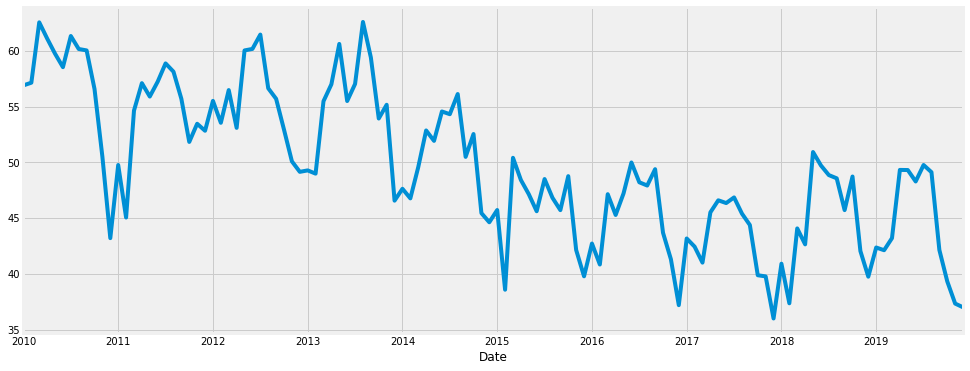

In [16]:
# Plot basic time series figure

y.plot(figsize=(15, 6))
plt.show()

In [17]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generating different seasonal parameter combinations
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
# Fit the model using ARIMA and check for the AIC score

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}2 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)2 - AIC:1270.4997163089895
ARIMA(0, 0, 0)x(0, 0, 1, 12)2 - AIC:1032.123826806765
ARIMA(0, 0, 0)x(0, 1, 0, 12)2 - AIC:625.712561132923
ARIMA(0, 0, 0)x(0, 1, 1, 12)2 - AIC:543.0060105862841
ARIMA(0, 0, 0)x(1, 0, 0, 12)2 - AIC:618.932793716811
ARIMA(0, 0, 0)x(1, 0, 1, 12)2 - AIC:575.6984385041806
ARIMA(0, 0, 0)x(1, 1, 0, 12)2 - AIC:547.6337861461591
ARIMA(0, 0, 0)x(1, 1, 1, 12)2 - AIC:542.6837494172378
ARIMA(0, 0, 1)x(0, 0, 0, 12)2 - AIC:1119.3795085491179
ARIMA(0, 0, 1)x(0, 0, 1, 12)2 - AIC:902.5680580390521
ARIMA(0, 0, 1)x(0, 1, 0, 12)2 - AIC:595.562313588529
ARIMA(0, 0, 1)x(0, 1, 1, 12)2 - AIC:519.9474309076123
ARIMA(0, 0, 1)x(1, 0, 0, 12)2 - AIC:603.5513096740066
ARIMA(0, 0, 1)x(1, 0, 1, 12)2 - AIC:547.1312617311618
ARIMA(0, 0, 1)x(1, 1, 0, 12)2 - AIC:530.8270540064527
ARIMA(0, 0, 1)x(1, 1, 1, 12)2 - AIC:521.8536971052818
ARIMA(0, 1, 0)x(0, 0, 0, 12)2 - AIC:647.1061549267314
ARIMA(0, 1, 0)x(0, 0, 1, 12)2 - AIC:574.1806986554195
ARIMA(0, 1, 0)x(0, 1, 0, 12)2

In [20]:
# Dividing the data

pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [21]:
print(pred_dynamic_ci)

            lower Crime Counts  upper Crime Counts
Date                                              
2018-01-01           32.627170           42.750919
2018-02-01           29.420929           40.161520
2018-03-01           36.474217           47.819477
2018-04-01           35.726478           47.645567
2018-05-01           36.908007           49.374544
2018-06-01           36.668344           49.659277
2018-07-01           37.402390           50.897359
2018-08-01           37.226181           51.207025
2018-09-01           34.994648           49.445040
2018-10-01           32.827500           47.732655
2018-11-01           29.580608           44.927059
2018-12-01           26.392588           42.167727
2019-01-01           28.706734           44.718973
2019-02-01           26.161089           42.494980
2019-03-01           31.290876           47.938730
2019-04-01           31.844120           48.800144
2019-05-01           33.059594           50.318286
2019-06-01           32.870128 

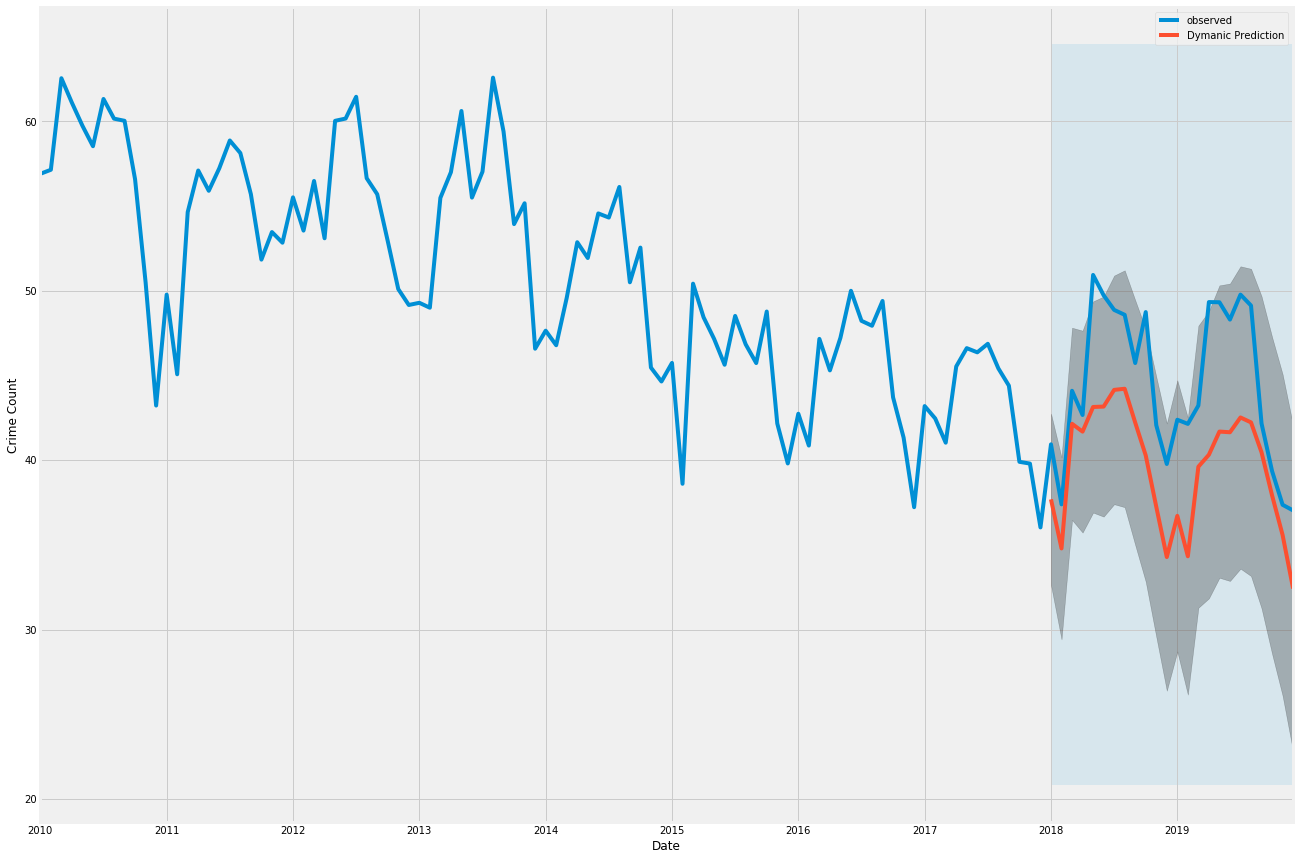

In [22]:
# Plot the results of observed versus the Dynamic predictions

ax = y['2009':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dymanic Prediction', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')

plt.legend()
plt.show()

In [23]:
# Extract the predicted and true values of our time series

y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
from sklearn import metrics
#print result of MAE

mae = metrics.mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))


RMSE = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(RMSE, 2)))

The Mean Squared Error of our forecasts is 30.18
The Mean Absolute Error of our forecasts is 4.94
The Root Mean Squared Error of our forecasts is 5.49


In [24]:
# Get forecast for 1 year ahead in the future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [25]:
# Check for the Confidence interval of these forecasts using Upper and lower boundries

pred_ci

,lower Crime Counts,upper Crime Counts
2020-01-01,33.758784,43.716360
2020-02-01,30.604308,41.171519
2020-03-01,36.512458,47.677120
2020-04-01,35.856963,47.588486
2020-05-01,38.080760,50.352991
2020-06-01,37.749944,50.540043
2020-07-01,38.071927,51.359728
2020-08-01,37.620533,51.388054
2020-09-01,36.097100,50.328180
2020-10-01,34.185405,48.865413


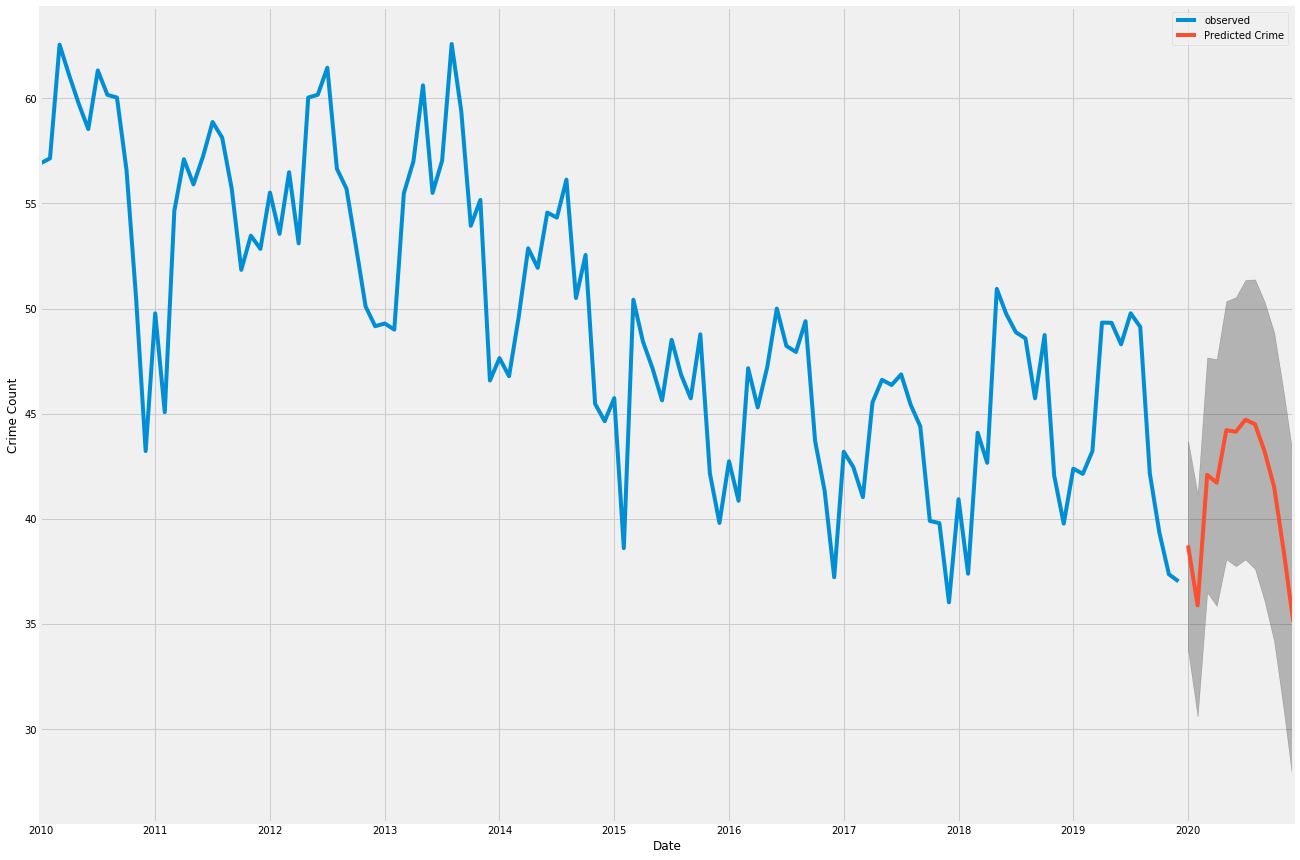

In [26]:
# Plot the Observed results against the Predicted crime results

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Crime')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')

plt.legend()
plt.show()

In [27]:
#print result of MAE

mae = metrics.mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))


The Mean Absolute Error of our forecasts is 4.94
